In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 50
sns.set_style('darkgrid')

# What is NIFTY 50

![](https://imgur.com/fEgI9b6.png)


The NIFTY 50 index is [National Stock Exchange of India's](https://en.wikipedia.org/wiki/National_Stock_Exchange_of_India) benchmark broad based stock market index for the Indian equity market. NIFTY 50 stands for National Index Fifty, and represents the weighted average of 50 Indian company stocks in 17 sectors. It is one of the two main stock indices used in India, the other being the BSE Sensex


![](https://i2.wp.com/stableinvestor.com/wp-content/uploads/2019/09/Nifty-Indexes-Broad-Markets.png?w=630&ssl=1)

The dataset consists of 13 files.Let's quickly understand what those are:

## INDIAVIX 

India VIX is a volatility index based on the NIFTY Index Option prices.Volatility Index is a measure of market’s expectation of volatility over the near term. Volatility is often described as the “rate and magnitude of changes in prices" and in finance often referred to as risk. Volatility Index is a measure, of the amount by which an underlying Index is expected to fluctuate, in the near term,

## NIFTY 50, NIFTY 100 and NIFTY 500 
  * NIFTY 500 - It represents the top 500 companies based on full market capitalisation from the eligible universe
  * NIFTY 100 - This represents the top 100 companies (i.e. from 1 to 100) from within the NIFTY 500. This index basically tries to track the performance of companies having large market caps.
  * NIFTY 50 - This represents the first 50 companies from the NIFTY 100.

## NIFTY SMALL CAP & MID CAP
* NIFTY SMALLCAP - This index measures the performance of small-cap companies.
* NIFTY MIDCAP - This index tries to measure the performance of mid-cap companies.

## NIFTY NEXT 50
This includes the remaining 50 companies from NIFTY 100 after excluding the NIFTY 50 companies. These are also called as NIFTY Junior.

## NIFTY SECTORAL INDICES
This includes NIFTY AUTO,NIFTY BANK, NIFTY FMCG, NIFTY IT,NIFTY METAL, NIFTY PHARMA
These Indices are designed to reflect the behavior and performance of the segment that they reflect i.e automobiles, bank, pharma etc.



In [3]:
nifty_50 = pd.read_csv('../input/nifty-indices-dataset/NIFTY 50.csv',parse_dates=["Date"], index_col="Date")
nifty_50.head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


## About the Stock Data

Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.

* **The Open and Close columns** indicate the opening and closing price of the stocks on a particular day.
* **The High and Low columns** provide the highest and the lowest price for the stock on a particular day, respectively.
* **The Volume column** tells us the total volume of stocks traded on a particular day.
* **The Turnover column** refers to the total value of stocks traded during a specific period of time. The time period may be annually, quarterly, monthly or daily
* **P/E** also called as the price-earnings ratio relates a company's share price to its earnings per share.
* **P/B** also called as Price-To-Book ratio measures the market's valuation of a company relative to its book value.
* **Div Yield** or the dividend yield is the amount of money a company pays shareholders (over the course of a year) for owning a share of its stock divided by its current stock price—displayed as a percentage.  

**Missing Values**

In [4]:
nifty_50.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       1
Turnover     1
P/E          0
P/B          0
Div Yield    0
dtype: int64

In [5]:
nifty_50.interpolate(method='time', inplace=True)

# Analysing the NIFTY 50 data

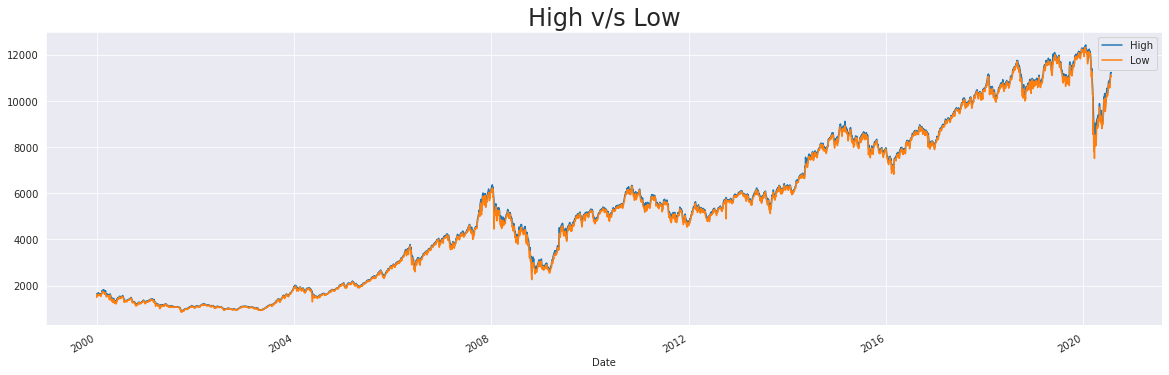

In [6]:
ax = nifty_50[['High', 'Low']].plot(figsize=(20, 6))
ax.set_title('High v/s Low', fontsize=24);

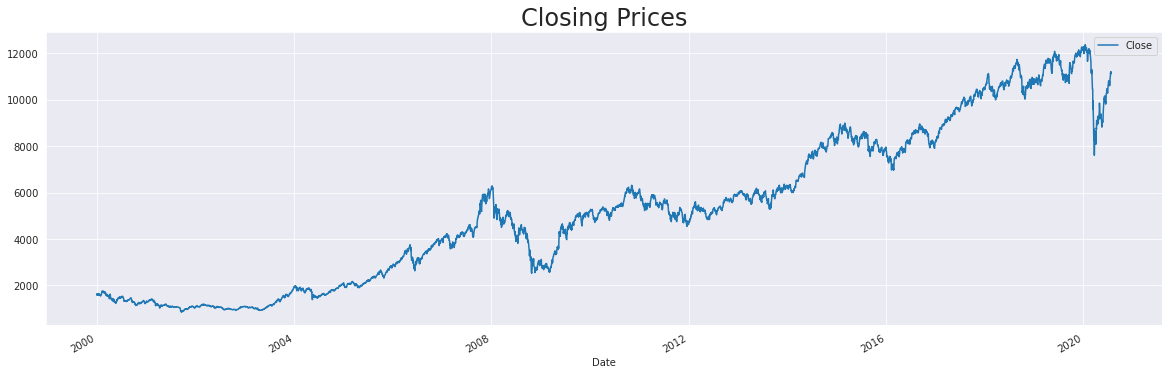

In [7]:
ax = nifty_50[['Close']].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24);

## P/E v/s P/B Ratio : Which one to use?

[P/E ratio is a popular measure](https://towardsdatascience.com/visualizing-the-stock-market-with-tableau-c0a7288e7b4d) of how expensive a company’s stock is. It is simply the company’s market capitalization divided by its net income — in other words, how much does it cost us to buy $1 of a particular company’s earnings. The higher the P/E ratio, all other things equal, the more expensive a stock is perceived to be.the P/E ratio shows what the market is willing to pay today for a stock based on its past or future earnings. A high P/E could mean that a stock's price is high relative to earnings and possibly overvalued. Conversely, a low P/E might indicate that the current stock price is low relative to earnings. 

![](https://imgur.com/mNCjWPD.png)

The **P/B ratio** on the other hand measures the market's valuation of a company relative to its book value.P/B ratio is used by value investors to identify potential investments and P/B ratios under 1 are typically considered solid investments.

![](https://imgur.com/uFGqIRV.png)

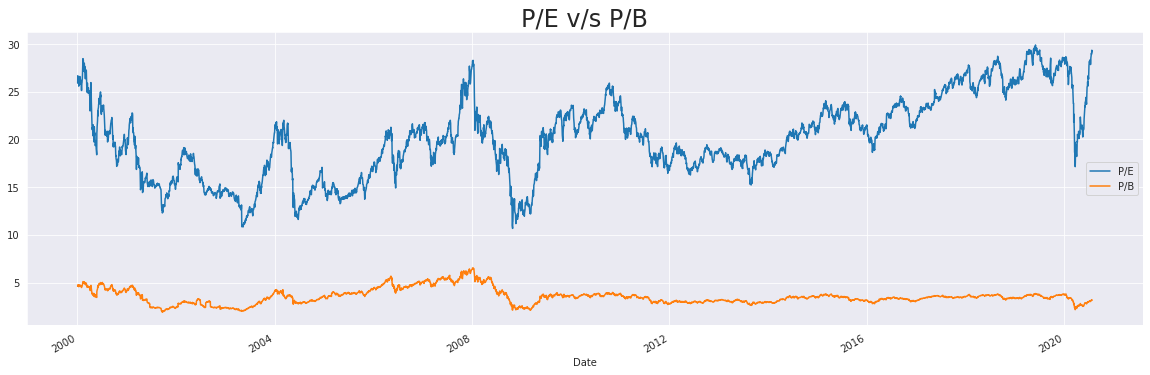

In [8]:
ax = nifty_50[['P/E', 'P/B']].plot(figsize=(20, 6))
ax.set_title('P/E v/s P/B', fontsize=24);

## Market Performance 2019 Onwards

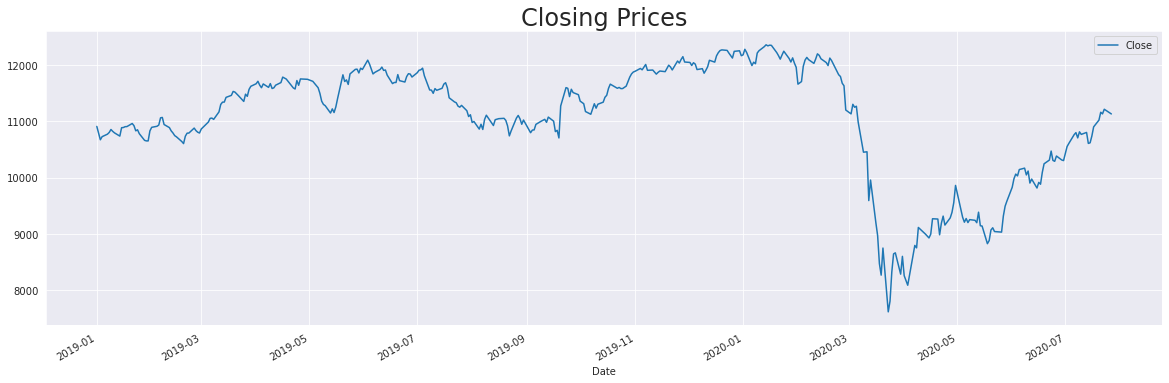

In [9]:
ax = nifty_50[['Close']]['2019':].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24);

## Performance of other Nifty Sectoral Indices in 2020

Let us now see the performance of NIFTY's sectoral indices which have been provided in the data. It'll be interesting to see how they have fared in these times of turmoil.

Let's quickly understand what each of them represent:

* **NIFTy Auto Index**: The Nifty Auto Index is designed to reflect the behavior and performance of the Automobiles sector which includes manufacturers of cars & motorcycles, heavy vehicles, auto ancillaries, tyres, etc. 

* **NIFTY Bank Index**: Nifty Bank Index is an index comprised of the most liquid and large capitalised Indian Banking stocks. It provides investors and market intermediaries with a benchmark that captures the capital market performance of Indian Banks

* **NIFTY FMCG Index**: The Nifty FMCG Index comprises of maximum of 15 companies who manufacture such FMGC(Fast Moving Consumer Goods) products

* **NIFTY IT Index**: Companies in this index are those that have more than 50% of their turnover from IT related activities like IT Infrastructure , IT Education and Software Training , Telecommunication Services and Networking Infrastructure, Software Development, Hardware Manufacturer’s, Vending, Support and Maintenance.

* **NIFTY Metal Index**: The Nifty Metal Index is designed to reflect the behavior and performance of the Metals sector including mining. The Nifty Metal Index comprises of maximum of 15 stocks that are listed on the National Stock Exchange.

* **NIFTY Pharma Index**: Nifty Pharma Index to capture the performance of the Pharmaceuticals companies in this sector.

In [10]:
nifty_auto = pd.read_csv('../input/nifty-indices-dataset/NIFTY AUTO.csv',parse_dates=["Date"], index_col="Date")
nifty_bank = pd.read_csv('../input/nifty-indices-dataset/NIFTY BANK.csv',parse_dates=["Date"], index_col="Date")
nifty_fmcg = pd.read_csv('../input/nifty-indices-dataset/NIFTY FMCG.csv',parse_dates=["Date"], index_col="Date")
nifty_IT = pd.read_csv('../input/nifty-indices-dataset/NIFTY IT.csv',parse_dates=["Date"], index_col="Date")
nifty_metal = pd.read_csv('../input/nifty-indices-dataset/NIFTY METAL.csv',parse_dates=["Date"], index_col="Date")
nifty_pharma = pd.read_csv('../input/nifty-indices-dataset/NIFTY PHARMA.csv',parse_dates=["Date"], index_col="Date")


nifty_auto.interpolate(method='time', inplace=True)
nifty_bank.interpolate(method='time', inplace=True)
nifty_fmcg.interpolate(method='time', inplace=True)
nifty_IT.interpolate(method='time', inplace=True)
nifty_metal.interpolate(method='time', inplace=True)
nifty_pharma.interpolate(method='time', inplace=True)

df = pd.DataFrame({
    'NIFTY Auto index': nifty_auto['Close']['2020':].values, 
    'NIFTY Bank index': nifty_bank['Close']['2020':].values,
    'NIFTY FMCG index': nifty_fmcg['Close']['2020':].values,
    'NIFTY IT index': nifty_IT['Close']['2020':].values,
    'NIFTY Metal index': nifty_metal['Close']['2020':].values,
    'NIFTY Pharma index': nifty_pharma['Close']['2020':].values,
})

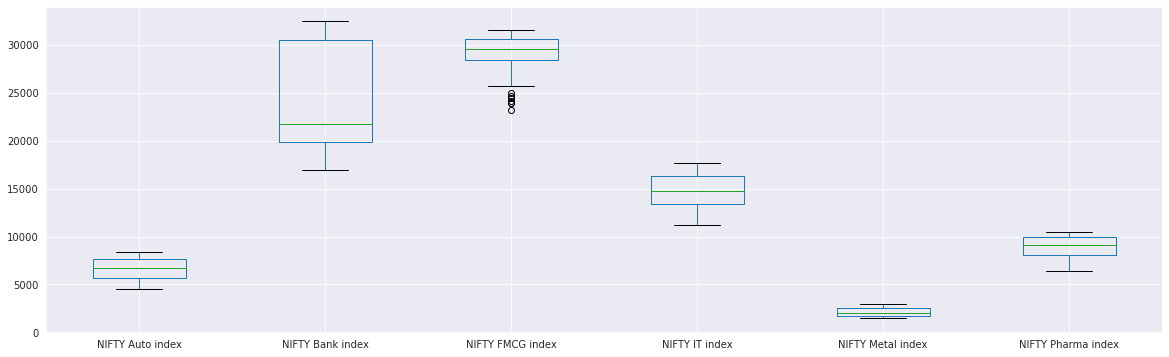

In [11]:
ax = df.plot.box(figsize=(20, 6))

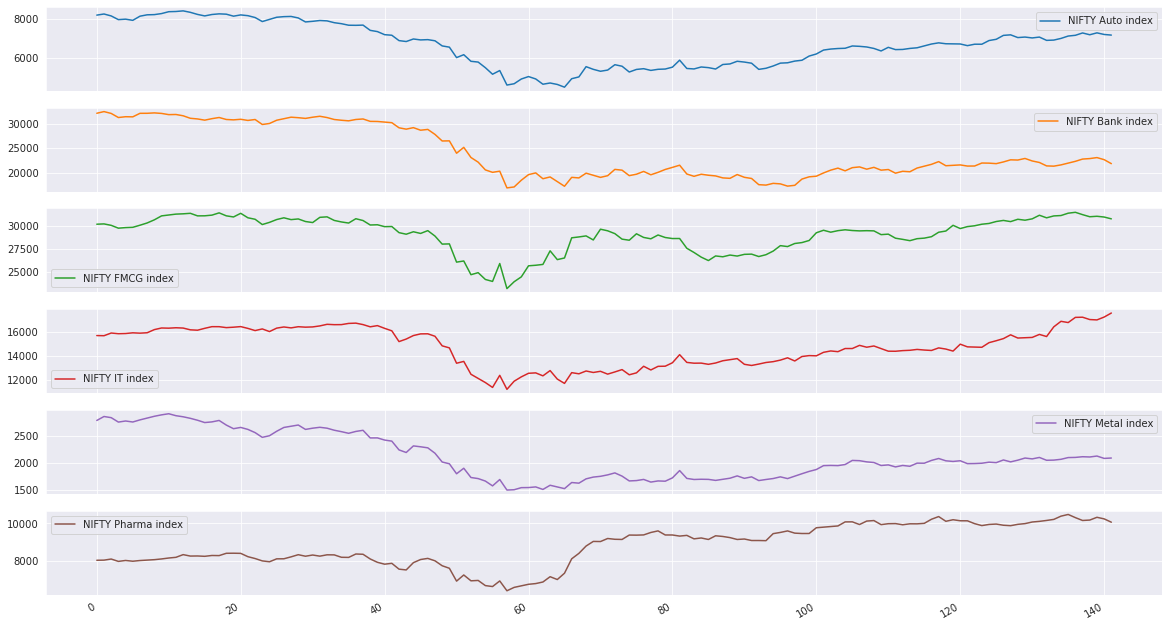

In [12]:
ax = df.plot(subplots=True, figsize=(20, 12))

# Time Series Analysis

## What is Time Series Data
Time series data is a sequence of data points in chronological order that is used by businesses to analyze past data and make future predictions. These data points are a set of observations at specified times and equal intervals, typically with a datetime index and corresponding value. Common examples of time series data in our day-to-day lives include:     

* Measuring weather temperatures 
* Measuring the number of taxi rides per month
* Predicting a company’s stock prices for the next day


## Components of Time Series

Time series data consist of four components:

1. Trend Component: This is a variation that moves up or down in a reasonably predictable pattern over a long period.

2. Seasonality Component: is the variation that is regular and periodic and repeats itself over a specific period such as a day, week, month, season, etc.,

3. Cyclical Component: is the variation that corresponds with business or economic 'boom-bust' cycles or follows their own peculiar cycles, and

4. Random Component: is the variation that is erratic or residual and does not fall under any of the above three classifications.

<img src='https://kite.com/wp-content/uploads/2019/08/variations-of-time-series.jpg'>

## Dataset
In this notebook, we’ll use it to analyze stock prices of RELIANCE 

* The **Open and Close columns** indicate the opening and closing price of the stocks on a particular day.
* The **High and Low columns** provide the highest and the lowest price for the stock on a particular day, respectively.
* The **Volume column** tells us the total volume of stocks traded on a particular day.
* The **volume weighted average price (VWAP)** is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security

In [13]:
data = pd.read_csv("/kaggle/input/nifty50-stock-market-data/RELIANCE.csv", parse_dates=['Date'], index_col='Date', usecols=['Date', 'Open','High','Low','Close','Volume','VWAP'])
print(data.shape)
data.head()

(5184, 6)


,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2000-01-03,237.50,251.70,237.50,251.70,249.37,4456424
2000-01-04,258.40,271.85,251.30,271.85,263.52,9487878
2000-01-05,256.65,287.90,256.65,282.50,274.79,26833684
2000-01-06,289.00,300.70,289.00,294.35,295.45,15682286
2000-01-07,295.00,317.90,293.00,314.55,308.91,19870977


In [14]:
data.tail()

,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2020-10-26,2101.95,2101.95,2018.5,2029.10,2052.69,17225340
2020-10-27,2034.90,2059.85,2005.0,2034.50,2026.38,16835011
2020-10-28,2041.80,2057.70,2007.4,2011.45,2026.02,13810054
2020-10-29,1997.00,2042.00,1991.0,2026.90,2019.57,14147681
2020-10-30,2033.50,2065.10,2021.8,2054.50,2040.66,15701123


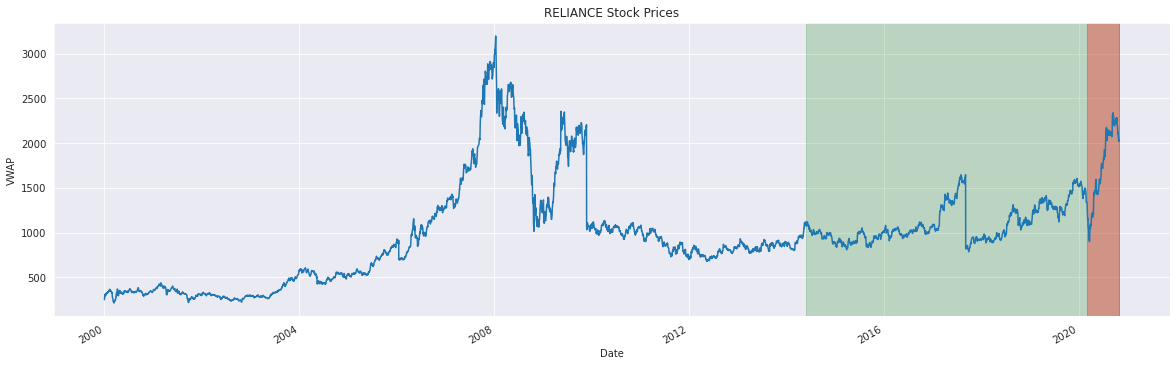

In [15]:
ax = data['VWAP'].plot(figsize=(20,6))
ax.set_title('RELIANCE Stock Prices')
ax.axvspan('2014-06-01','2020-10-30', color='green', alpha=0.2) # Modi Govt
ax.axvspan('2020-03-01','2020-10-30', color='red', alpha=0.3) # Covid Pandemic
ax.set_ylabel('VWAP');

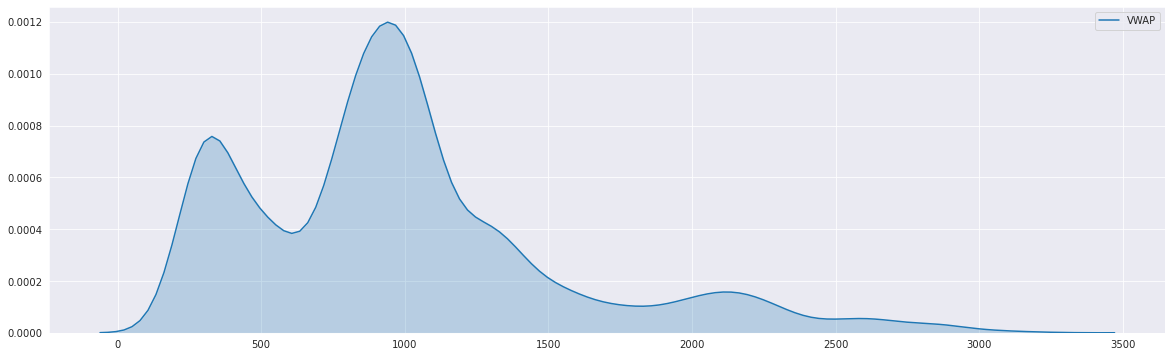

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.kdeplot(data['VWAP'],shade=True, ax=ax);

## Resampling and Missing Treatment

In [17]:
data = data.resample('D').mean()
data.isnull().sum()

Open      2423
High      2423
Low       2423
Close     2423
VWAP      2423
Volume    2423
dtype: int64

In [18]:
data.interpolate(method='time', inplace=True)

## Seasonal decomposition

We can decompose a time series into trend, seasonal amd remainder components. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels is used to implements the decomposition.

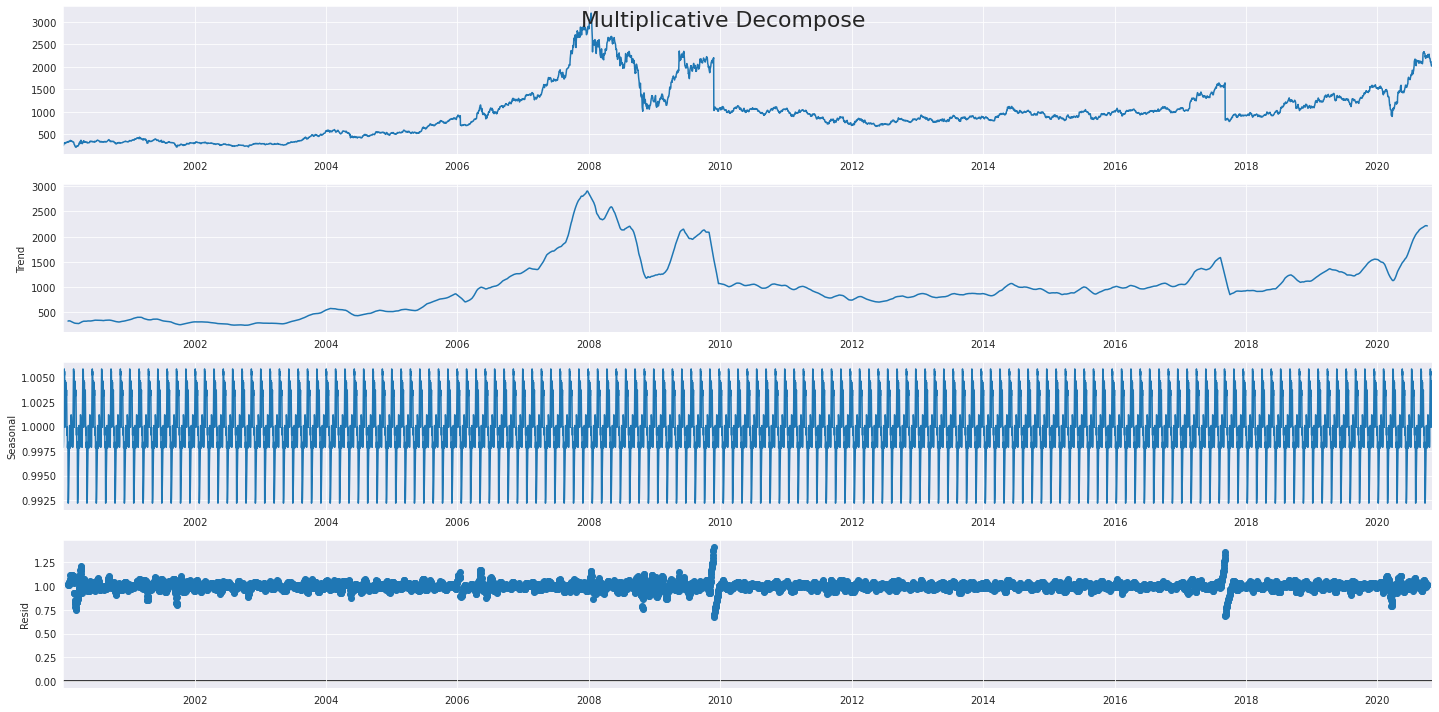

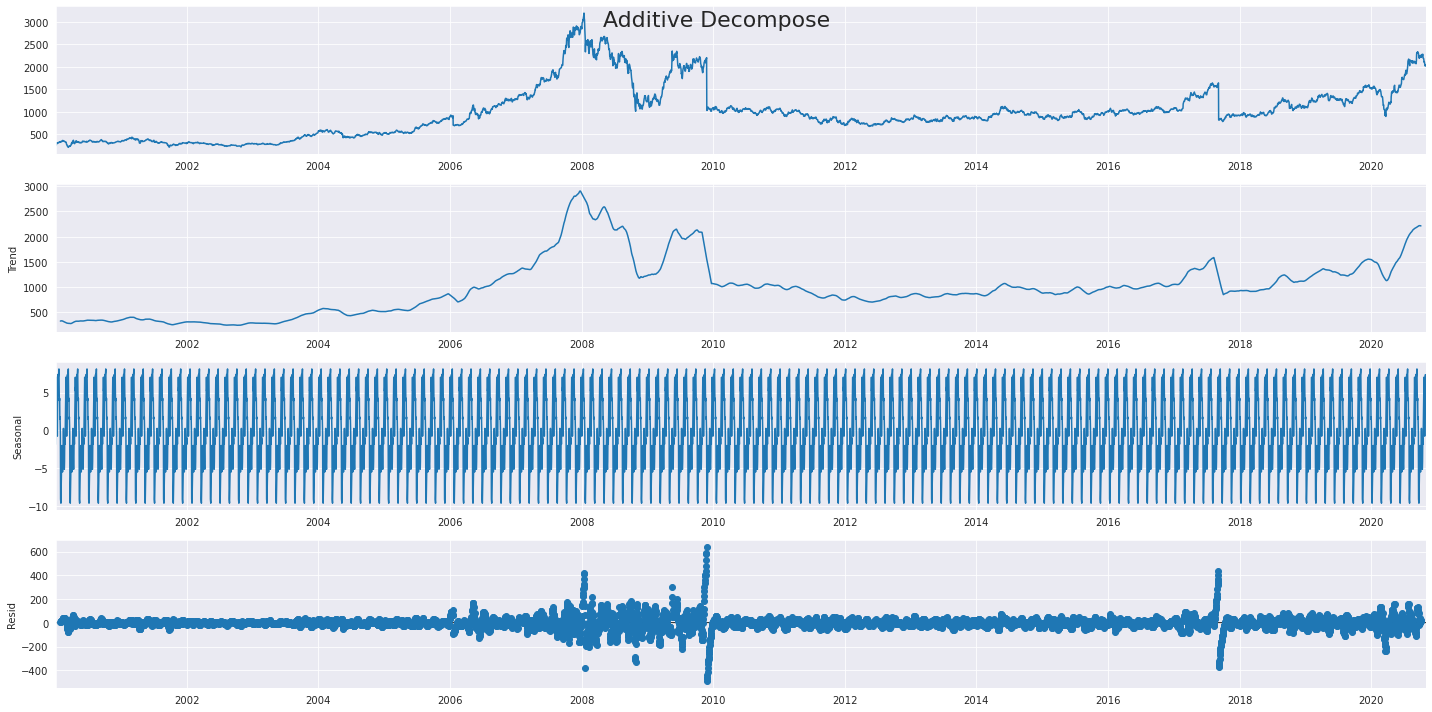

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (20,10)})
y = data['VWAP'].to_frame()


# Multiplicative Decomposition 
seasonal_decompose(y, model='multiplicative',period = 52).plot().suptitle('Multiplicative Decompose', fontsize=22)

# Additive Decomposition
seasonal_decompose(y, model='additive',period = 52).plot().suptitle('Additive Decompose', fontsize=22);

## Stationarity

In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. The algebraic equivalent is thus a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows, but the way it changes remains constant — it has a constant slope; one value that captures that rate of change.

In [20]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string(), '\n')          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
    return out

adf_test(data['VWAP'],title='Reliance Stock Data');

Augmented Dickey-Fuller Test: Reliance Stock Data
ADF test statistic        -1.697706
p-value                    0.432295
# lags used                7.000000
# observations          7599.000000
critical value (1%)       -3.431211
critical value (5%)       -2.861920
critical value (10%)      -2.566972 

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


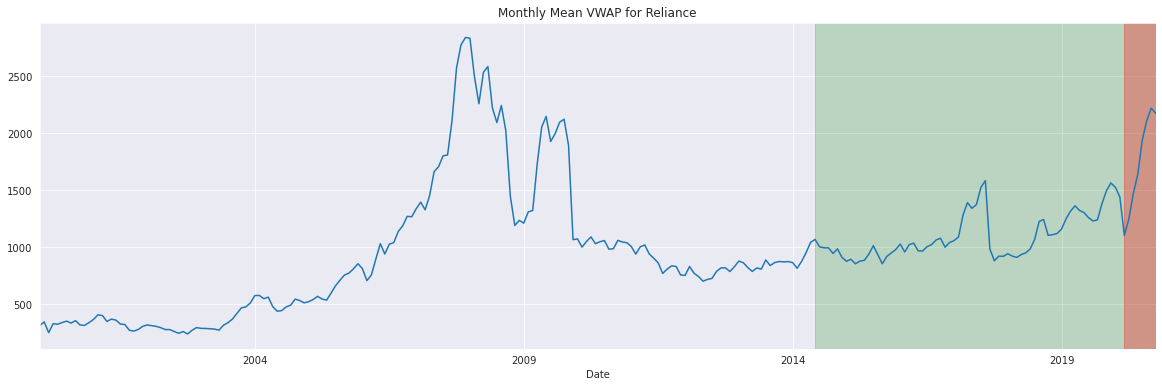

In [21]:
ax = data['VWAP'].resample('M').mean().plot.line(figsize=(20, 6))
ax.axvspan('2014-06','2020-10', color='green', alpha=0.2) # Modi Govt
ax.axvspan('2020-03','2020-10', color='red', alpha=0.3) # Covid Pandemic
ax.set_title('Monthly Mean VWAP for Reliance');

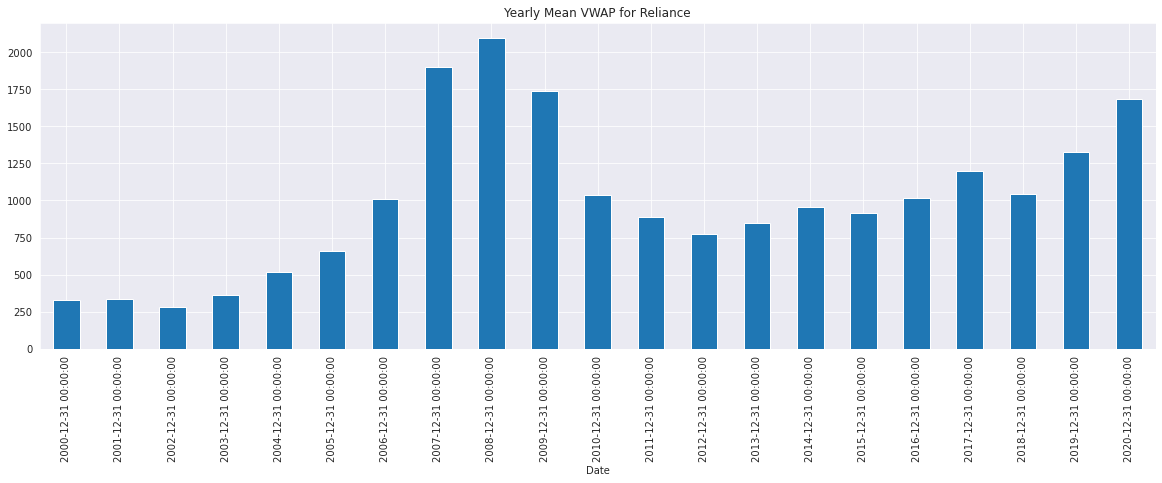

In [22]:
ax = data['VWAP'].resample('A').mean().plot.bar(figsize=(20, 6))
ax.set_title('Yearly Mean VWAP for Reliance');

# Plotting ACF and PACF

**Autocorrelation** and **partial autocorrelation** plots are heavily used in time series analysis and forecasting.

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

**Statistical correlation** summarizes the strength of the relationship between two variables.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a **serial correlation, or an autocorrelation.**

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a **correlogram or an autocorrelation plot**.

A **partial autocorrelation** is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

A **partial autocorrelation** is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

In [23]:
import statsmodels.api as sm

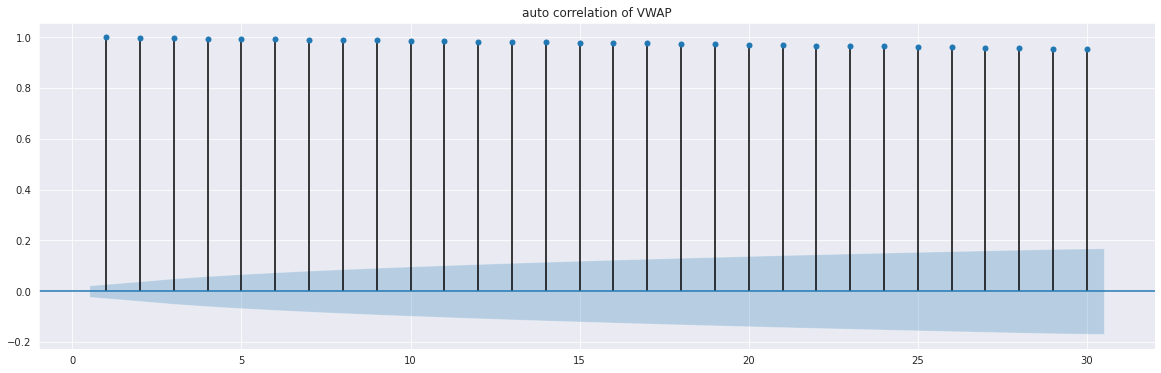

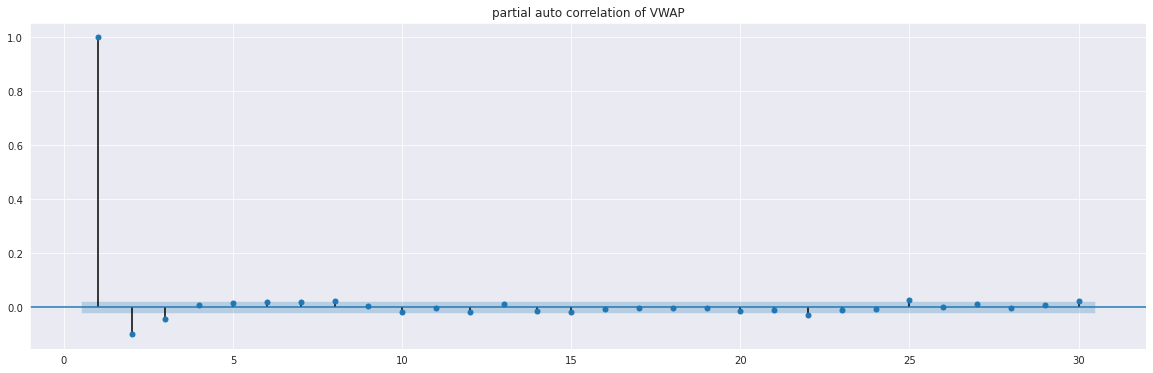

In [24]:
plt.rcParams.update({'figure.figsize': (20,6)})

sm.graphics.tsa.plot_acf(data['VWAP'], lags=30,title='auto correlation of VWAP',zero=False);
sm.graphics.tsa.plot_pacf(data['VWAP'], lags=30,title='partial auto correlation of VWAP',zero=False);

# Feature Engineering
Almost every time series problem will have some external features or some internal feature engineering to help the model.

Let's add some basic features like lag values of available numeric features that are widely used for time series problems. Since we need to predict the price of the stock for a day, we cannot use the feature values of the same day since they will be unavailable at actual inference time. We need to use statistics like mean, standard deviation of their lagged values.

We will use three sets of lagged values, one previous day, one looking back 7 days and another looking back 30 days as a proxy for last week and last month metrics.

In [25]:
data = data.reset_index()
lag_features = ["Open", "High", "Low", "Close", "VWAP", "Volume"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = data[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = data[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = data[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    data[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    data[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    data[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    data[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    data[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    data[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

data.set_index("Date", drop=False, inplace=True)
data.interpolate(method='time', inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

,Date,Open,High,Low,Close,VWAP,Volume,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,VWAP_mean_lag3,VWAP_mean_lag7,VWAP_mean_lag30,VWAP_std_lag3,VWAP_std_lag7,VWAP_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,237.50,251.70,237.50,251.70,249.37,4456424.0,990.656860,990.181274,987.318970,11.209914,18.192175,38.400440,1004.692444,1004.216370,1001.343323,9.677042,16.797731,37.671532,974.950623,974.485596,971.672363,9.690401,16.797955,37.515213,989.297180,988.831177,986.011658,10.212444,17.199333,37.532627,989.811646,989.345825,986.506836,8.989942,15.987906,36.881386,5396025.5,5395084.0,5398624.5,1173357.00,1.633788e+06,2238794.25
2000-01-04,2000-01-04,258.40,271.85,251.30,271.85,263.52,9487878.0,237.500000,237.500000,237.500000,11.209914,18.192175,38.400440,251.699997,251.699997,251.699997,9.677042,16.797731,37.671532,237.500000,237.500000,237.500000,9.690401,16.797955,37.515213,251.699997,251.699997,251.699997,10.212444,17.199333,37.532627,249.369995,249.369995,249.369995,8.989942,15.987906,36.881386,4456424.0,4456424.0,4456424.0,1173357.00,1.633788e+06,2238794.25
2000-01-05,2000-01-05,256.65,287.90,256.65,282.50,274.79,26833684.0,247.949997,247.949997,247.949997,14.778532,14.778532,14.778532,261.774994,261.774994,261.774994,14.248201,14.248201,14.248201,244.399994,244.399994,244.399994,9.758074,9.758074,9.758074,261.774994,261.774994,261.774994,14.248201,14.248201,14.248201,256.445007,256.445007,256.445007,10.005561,10.005561,10.005561,6972151.0,6972151.0,6972151.0,3557775.25,3.557775e+06,3557775.25
2000-01-06,2000-01-06,289.00,300.70,289.00,294.35,295.45,15682286.0,250.850006,250.850006,250.850006,11.594503,11.594503,11.594503,270.483337,270.483337,270.483337,18.138657,18.138657,18.138657,248.483337,248.483337,248.483337,9.880832,9.880832,9.880832,268.683319,268.683319,268.683319,15.642277,15.642277,15.642277,262.559998,262.559998,262.559998,12.737163,12.737163,12.737163,13592662.0,13592662.0,13592662.0,11739778.00,1.173978e+07,11739778.00
2000-01-07,2000-01-07,295.00,317.90,293.00,314.55,308.91,19870977.0,268.016663,260.387512,260.387512,18.193153,21.295006,21.295006,286.816681,278.037506,278.037506,14.455478,21.156614,21.156614,265.649994,258.612488,258.612488,20.397856,21.805672,21.805672,282.899994,275.100006,275.100006,11.255332,18.105661,18.105661,277.920013,270.782501,270.782501,16.193483,19.457516,19.457516,17334616.0,14115068.0,14115068.0,8790159.00,9.642262e+06,9642262.00


For boosting models, it is very useful to add datetime features like hour, day, month, as applicable to provide the model information about the time component in the data. For time series models it is not explicitly required to pass this information

In [26]:
data.Date = pd.to_datetime(data.Date, format="%Y-%m-%d")
data["month"] = data.Date.dt.month
data["week"] = data.Date.dt.week
data["day"] = data.Date.dt.day
data["day_of_week"] = data.Date.dt.dayofweek
data.head()

,Date,Open,High,Low,Close,VWAP,Volume,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,VWAP_mean_lag3,VWAP_mean_lag7,VWAP_mean_lag30,VWAP_std_lag3,VWAP_std_lag7,VWAP_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,237.50,251.70,237.50,251.70,249.37,4456424.0,990.656860,990.181274,987.318970,11.209914,18.192175,38.400440,1004.692444,1004.216370,1001.343323,9.677042,16.797731,37.671532,974.950623,974.485596,971.672363,9.690401,16.797955,37.515213,989.297180,988.831177,986.011658,10.212444,17.199333,37.532627,989.811646,989.345825,986.506836,8.989942,15.987906,36.881386,5396025.5,5395084.0,5398624.5,1173357.00,1.633788e+06,2238794.25,1,1,3,0
2000-01-04,2000-01-04,258.40,271.85,251.30,271.85,263.52,9487878.0,237.500000,237.500000,237.500000,11.209914,18.192175,38.400440,251.699997,251.699997,251.699997,9.677042,16.797731,37.671532,237.500000,237.500000,237.500000,9.690401,16.797955,37.515213,251.699997,251.699997,251.699997,10.212444,17.199333,37.532627,249.369995,249.369995,249.369995,8.989942,15.987906,36.881386,4456424.0,4456424.0,4456424.0,1173357.00,1.633788e+06,2238794.25,1,1,4,1
2000-01-05,2000-01-05,256.65,287.90,256.65,282.50,274.79,26833684.0,247.949997,247.949997,247.949997,14.778532,14.778532,14.778532,261.774994,261.774994,261.774994,14.248201,14.248201,14.248201,244.399994,244.399994,244.399994,9.758074,9.758074,9.758074,261.774994,261.774994,261.774994,14.248201,14.248201,14.248201,256.445007,256.445007,256.445007,10.005561,10.005561,10.005561,6972151.0,6972151.0,6972151.0,3557775.25,3.557775e+06,3557775.25,1,1,5,2
2000-01-06,2000-01-06,289.00,300.70,289.00,294.35,295.45,15682286.0,250.850006,250.850006,250.850006,11.594503,11.594503,11.594503,270.483337,270.483337,270.483337,18.138657,18.138657,18.138657,248.483337,248.483337,248.483337,9.880832,9.880832,9.880832,268.683319,268.683319,268.683319,15.642277,15.642277,15.642277,262.559998,262.559998,262.559998,12.737163,12.737163,12.737163,13592662.0,13592662.0,13592662.0,11739778.00,1.173978e+07,11739778.00,1,1,6,3
2000-01-07,2000-01-07,295.00,317.90,293.00,314.55,308.91,19870977.0,268.016663,260.387512,260.387512,18.193153,21.295006,21.295006,286.816681,278.037506,278.037506,14.455478,21.156614,21.156614,265.649994,258.612488,258.612488,20.397856,21.805672,21.805672,282.899994,275.100006,275.100006,11.255332,18.105661,18.105661,277.920013,270.782501,270.782501,16.193483,19.457516,19.457516,17334616.0,14115068.0,14115068.0,8790159.00,9.642262e+06,9642262.00,1,1,7,4


In [27]:
exogenous_features = data.columns[7:]

In [28]:
df_train = data.loc[:"2018"]
df_valid = data.loc["2019"]

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dummy Model

RMSE: 399.6167277352926
MAE: 381.80183203678774


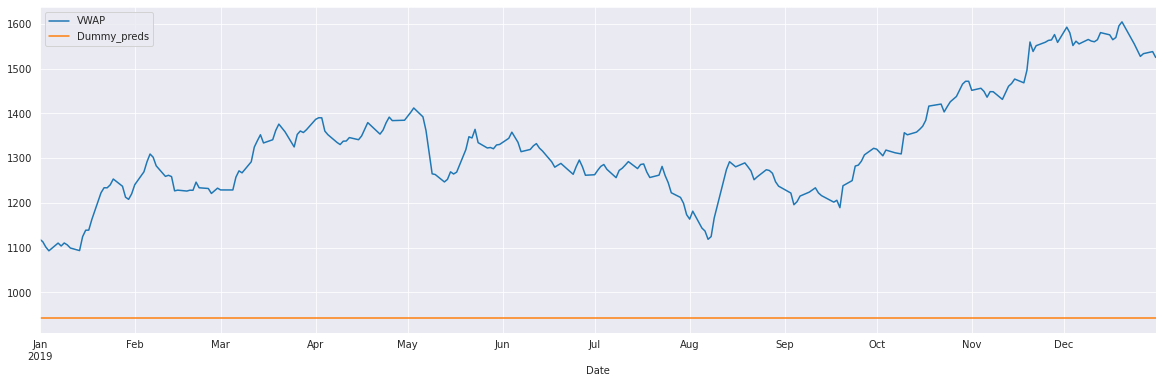

In [30]:
from sklearn.dummy import DummyRegressor

model = DummyRegressor().fit(df_train[exogenous_features], df_train['VWAP'])
df_valid['Dummy_preds'] = model.predict(df_valid[exogenous_features])
print('RMSE:', np.sqrt(mean_squared_error(df_valid['VWAP'], df_valid['Dummy_preds'])))
print('MAE:', mean_absolute_error(df_valid['VWAP'], df_valid['Dummy_preds']))
df_valid[['VWAP', 'Dummy_preds']].plot();

# LightGBM

RMSE: 36.31809251730984
MAE: 25.272291010435104


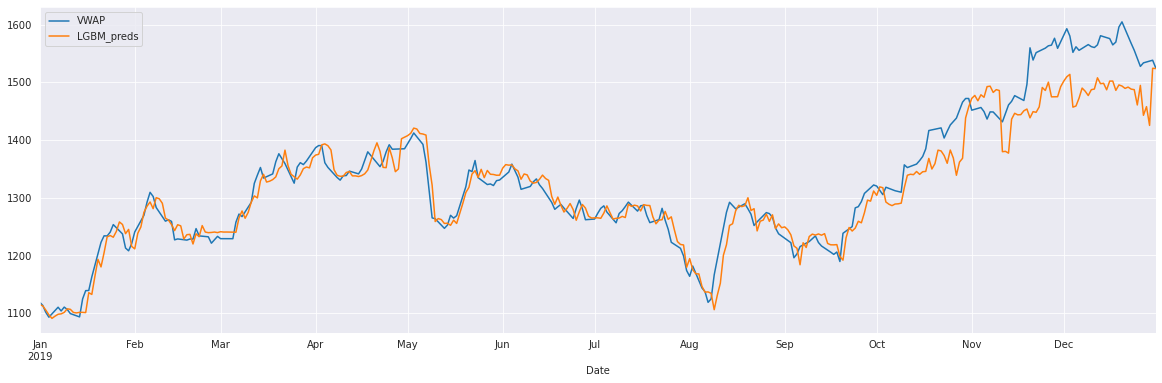

In [31]:
from lightgbm import LGBMRegressor

model = LGBMRegressor().fit(df_train[exogenous_features], df_train['VWAP'])
df_valid['LGBM_preds'] = model.predict(df_valid[exogenous_features])
print('RMSE:', np.sqrt(mean_squared_error(df_valid['VWAP'], df_valid['LGBM_preds'])))
print('MAE:', mean_absolute_error(df_valid['VWAP'], df_valid['LGBM_preds']))
df_valid[['VWAP', 'LGBM_preds']].plot();

# ARIMAX

In [32]:
!pip install pmdarima
from pmdarima import auto_arima

     |████████████████████████████████| 1.5 MB 1.3 MB/s 
     |████████████████████████████████| 2.1 MB 7.0 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64512.538, Time=69.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=65405.512, Time=16.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64643.311, Time=40.59 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=64571.966, Time=56.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=119831.606, Time=16.75 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=64567.058, Time=68.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64511.914, Time=57.75 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=64554.802, Time=58.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=64522.503, Time=60.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=64517.448, Time=69.35 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=64514.616, Time=68.50 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=65699.742, Time=29.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=64509.905, Time=61.95 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=64552.790, Time=59.70 sec
 ARI

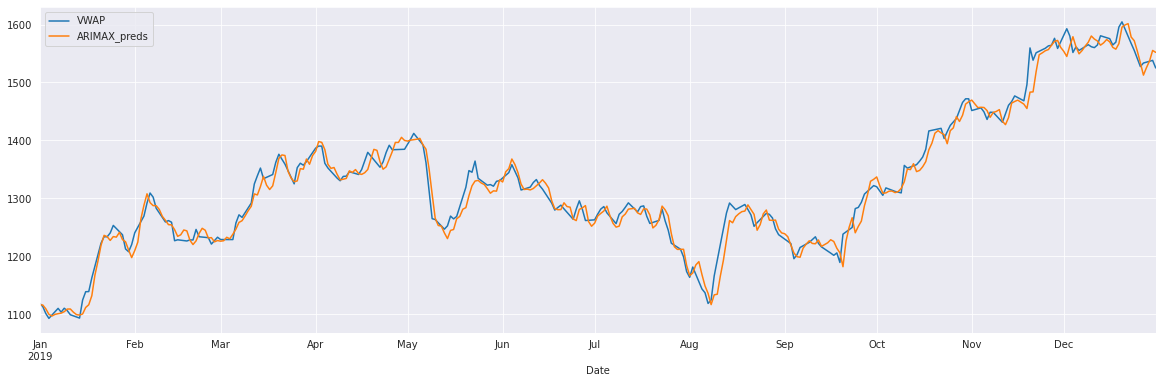

In [33]:
%%time

model = auto_arima(
    df_train.VWAP, exogenous=df_train[exogenous_features], 
    trace=True, error_action="ignore", suppress_warnings=True
).fit(df_train.VWAP, exogenous=df_train[exogenous_features])

df_valid["ARIMAX_preds"] = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])

print('RMSE:', np.sqrt(mean_squared_error(df_valid['VWAP'], df_valid['ARIMAX_preds'])))
print('MAE:', mean_absolute_error(df_valid['VWAP'], df_valid['ARIMAX_preds']))
df_valid[['VWAP', 'ARIMAX_preds']].plot();

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6938
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -32210.953
Date:                Sat, 14 Nov 2020   AIC                          64509.905
Time:                        06:58:31   BIC                          64811.075
Sample:                    01-03-2000   HQIC                         64613.730
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Open_mean_lag3       -0.6547      0.044    -15.020      0.000      -0.740      -0.569
Open_mean_lag7        0.4108      0.072      5.734      0.000       0.270       0.551
Open_mean_lag30      -0.4583      0.141     -3.245      0.001      -0.735      -0.181
Open_std_lag3        -0.1146      0.028     -4.106      0.000      -0.169      -0.060
Open_std_lag7        -0.1191      0.058     -2.053      0.040      -0.233      -0.005
Open_std_lag30        0.1244      0.116      1.074      0.283      -0.103       0.352
High_mean_lag3        0.2478      0.056      4.395      0.000       0.137       0.358
High_mean_lag7        0.1025      0.103      0.997      0.319      -0.099       0.304
High_mean_lag30      -0.0582      0.191     -0.305      0.761      -0.433       0.317
High_std_lag3         0.4355      0.042     10.387      0.000       0.353       0.518
High_std_lag7        -0.3941      0.073     -5.429      0.000      -0.536      -0.252
High_std_lag30        0.1928      0.129      1.492      0.136      -0.061       0.446
Low_mean_lag3         0.0310      0.056      0.549      0.583      -0.079       0.141
Low_mean_lag7        -0.3513      0.094     -3.730      0.000      -0.536      -0.167
Low_mean_lag30       -0.0172      0.174     -0.099      0.922      -0.358       0.324
Low_std_lag3         -0.6382      0.035    -18.376      0.000      -0.706      -0.570
Low_std_lag7          0.1711      0.068      2.520      0.012       0.038       0.304
Low_std_lag30        -0.4407      0.120     -3.671      0.000      -0.676      -0.205
Close_mean_lag3       1.8566      0.056     33.321      0.000       1.747       1.966
Close_mean_lag7      -0.3831      0.100     -3.813      0.000      -0.580      -0.186
Close_mean_lag30     -0.1719      0.235     -0.731      0.465      -0.633       0.289
Close_std_lag3       -0.2372      0.039     -6.113      0.000      -0.313      -0.161
Close_std_lag7        0.4992      0.070      7.173      0.000       0.363       0.636
Close_std_lag30      -0.4670      0.155     -3.005      0.003      -0.772      -0.162
VWAP_mean_lag3       -0.4750      0.094     -5.072      0.000      -0.659      -0.291
VWAP_mean_lag7        0.1950      0.177      1.102      0.271      -0.152       0.542
VWAP_mean_lag30       0.7248      0.295      2.455      0.014       0.146       1.303
VWAP_std_lag3        -0.1785      0.060     -2.998      0.003      -0.295      -0.062
VWAP_std_lag7        -0.1575      0.106     -1.484      0.138      -0.366       0.050
VWAP_std_lag30        0.5712      0.197      2.898      0.004       0.185       0.957
Volume_mean_lag3   1.401e-07   5.91e-07      0.237      0.812   -1.02e-06     1.3e-06
Volume_mean_lag7   -4.64e-07   8.13e-07     -0.571      0.568   -2.06e-06    1.13e-06
Volume_mean_lag30  3.719e-07   6.12e-07      0.608      0.543   -8.28e-07    1.57e-06
Volume_std_lag3    3.654e-07   5.09e-07      0.718      0.473   -6.33e-07    1.36e-06
Volume_std_lag7     4.19e-07   8.87e-07      0.472      0.6

## Error Analysis

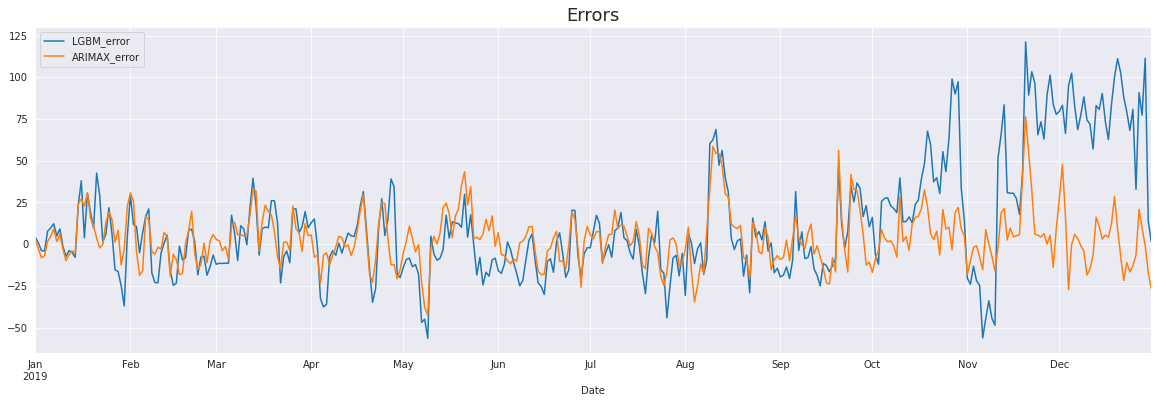

In [35]:
df_valid['ARIMAX_error'] = df_valid['VWAP'] - df_valid['ARIMAX_preds']
df_valid['LGBM_error'] = df_valid['VWAP'] - df_valid['LGBM_preds']
ax = df_valid[['LGBM_error', 'ARIMAX_error']].plot()
ax.set_title('Errors', fontsize=18);

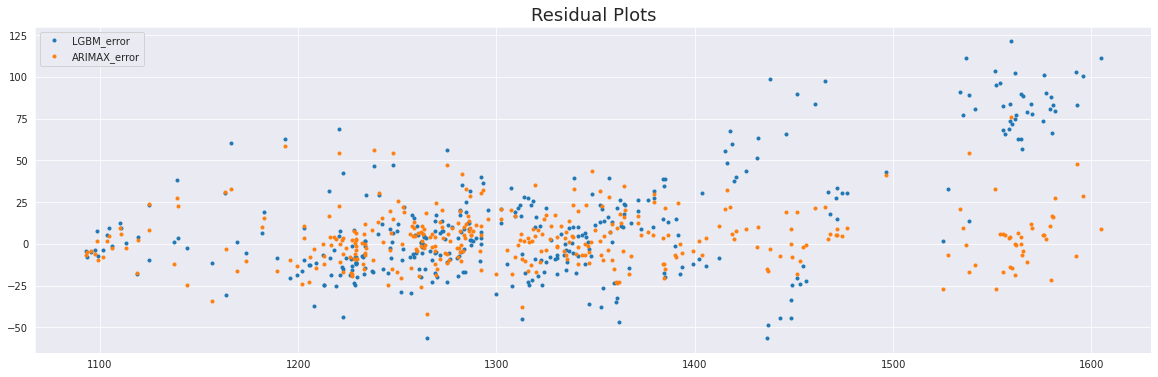

In [36]:
fig, ax = plt.subplots()
ax.plot(df_valid['VWAP'].values, df_valid['LGBM_error'].values, '.', label='LGBM_error')
ax.plot(df_valid['VWAP'].values, df_valid['ARIMAX_error'].values, '.', label='ARIMAX_error')
ax.set_title('Residual Plots', fontsize=18)
ax.legend();

The residuals are randomly distributed, which indicates that the models are performing very well

**References**

* [Nifty Data EDA](https://www.kaggle.com/parulpandey/nifty-data-eda)
* [Getting started with Time Series using Pandas](https://www.kaggle.com/parulpandey/getting-started-with-time-series-using-pandas)
* [A modern Time Series tutorial](https://www.kaggle.com/rohanrao/a-modern-time-series-tutorial)
* [Time Series Analysis and Forecasting - Reliance](https://www.kaggle.com/yashvi/time-series-analysis-and-forecasting-reliance)